# Deep Learning Basics

## Neural Network
A neural network is inspired by human brain and It is heart of Deep Learning.It is designed to recognize patterns and interpret sensory data through machine perception.

A typical neural network contains:
- **Input Layer** – Receives input features.
- **Hidden Layers** – Intermediate layers that apply activation functions.
- **Output Layer** – Produces predictions.

### 🔗 Key Applications:
- Image classification
- Natural Language Processing
- Time series prediction
- Fraud detection

> Neural Networks are the building blocks of **Deep Learning**.

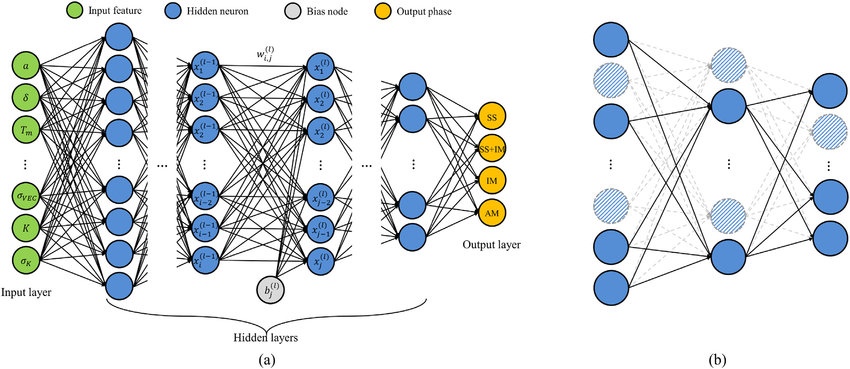

In [2]:
import torch
import torch.nn as nn
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from torch.nn import Sequential, Linear

model= nn.Sequential(
    nn.Linear(2,4), #Input layer
    nn.ReLU(), #Hidden layer
    nn.Linear(4,1) #Output layer
)

print(model)

2026-02-17 14:07:58.486948: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Sequential(
  (0): Linear(in_features=2, out_features=4, bias=True)
  (1): ReLU()
  (2): Linear(in_features=4, out_features=1, bias=True)
)


## 🔁 Forward Propagation
Forward propagation means:
Data flows from input → hidden → output layer.

We calculate prediction.
Given inputs $X$ and weights $W$:
$$ Z = XW + b $$
$$ A = \text{Activation}(Z) $$

Each layer's output becomes the next layer's input.


In [3]:
x = torch.tensor([[1.0, 2.0]])
output = model(x)
print(output)

tensor([[0.3343]], grad_fn=<AddmmBackward0>)


## 🔄 Backpropagation (Gradient Descent)
After prediction:

Compare prediction with actual answer

Calculate error (loss)

Send error backward

Update weights

This is called backpropagation.

- Computes gradients of the loss function with respect to weights.
- Uses **Chain Rule** of derivatives.
- Updates weights to reduce error:
$$ W := W - \alpha \cdot \frac{\partial L}{\partial W} $$

In [4]:
criterion = nn.MSELoss() #loss function
optimizer = torch.optim.SGD(model.parameters(), lr=0.01) #Optimizer

y_true = torch.tensor([[1.0]])

# Forward
y_pred = model(x)
loss = criterion(y_pred, y_true)

# Backward
loss.backward()
optimizer.step()
optimizer.zero_grad()


## 📊 Activation Functions
- **Sigmoid**: $\sigma(x) = \frac{1}{1 + e^{-x}}$
- **Tanh**: $\tanh(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}}$
- **ReLU**: $f(x) = \max(0, x)$

Each function introduces non-linearity to the model.

| Function | Use                   |
| -------- | --------------------- |
| ReLU     | Most common           |
| Sigmoid  | Binary classification |
| Tanh     | Old networks          |
| Softmax  | Multi-class           |


In [5]:
nn.ReLU()
nn.Sigmoid()
nn.Tanh()

Tanh()

## 🎯 Loss Function
Loss Fuction use To Predict Deep Learning Model Performance.
- **MSE**: For regression.
- **Cross Entropy**: For classification.

$$ L = -[y \log(\hat{y}) + (1 - y) \log(1 - \hat{y})] $$

| Problem               | Loss         |
| --------------------- | ------------ |
| Regression            | MSE          |
| Binary classification | BCE          |
| Multi-class           | CrossEntropy |


In [9]:
criterion = nn.CrossEntropyLoss()


## 6. Optimizers
Optimizer updates weights to reduce loss.

Common:

SGD

Adam

RMSprop

In [10]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

## 7. Epoch, Batch Size, Iteration
- Epoch: One full pass over dataset
    1 Epoch = Model sees full dataset once.

    If dataset = 1000 samples
    Epoch = 1 → model sees all 1000 samples once.

- Batch Size: Number of samples per training step
    Instead of training on full data at once,
    we split into small groups called batches.

    Example:

    Dataset = 1000 samples

    Batch size = 100

    So 10 batches

- Iteration: One batch update
    1 iteration = 1 batch training step.

    If: 1000 samples

    Batch size = 100

    Iterations per epoch = 10

## 8. Dropout
Dropout randomly turns off some neurons during training.
It helps prevent overfitting.

In [ ]:
model = nn.Sequential(
    nn.Linear(10, 20),
    nn.ReLU(),
    nn.Dropout(0.5),  # 50% neurons/data off
    nn.Linear(20, 1)
)

## 9. ANN Example
ANN means Basic neural network with fully connected layers.

Used for:

Tabular data

Regression

Classification

In [14]:
class ANN(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(10, 20)
        self.fc2 = nn.Linear(20, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        return self.fc2(x)

## 10. RNN Example
RNN is used for sequential data.
It remembers previous information.

Used for:

Text

Time series

Speech

In [13]:
rnn = nn.RNN(input_size=10, hidden_size=20, batch_first=True)

x = torch.randn(5, 3, 10)  # batch=5, sequence=3, features=10
output, hidden = rnn(x)


## 11. CNN Example
CNN is used for images.
It detects patterns like:

Edges

Shapes

Objects

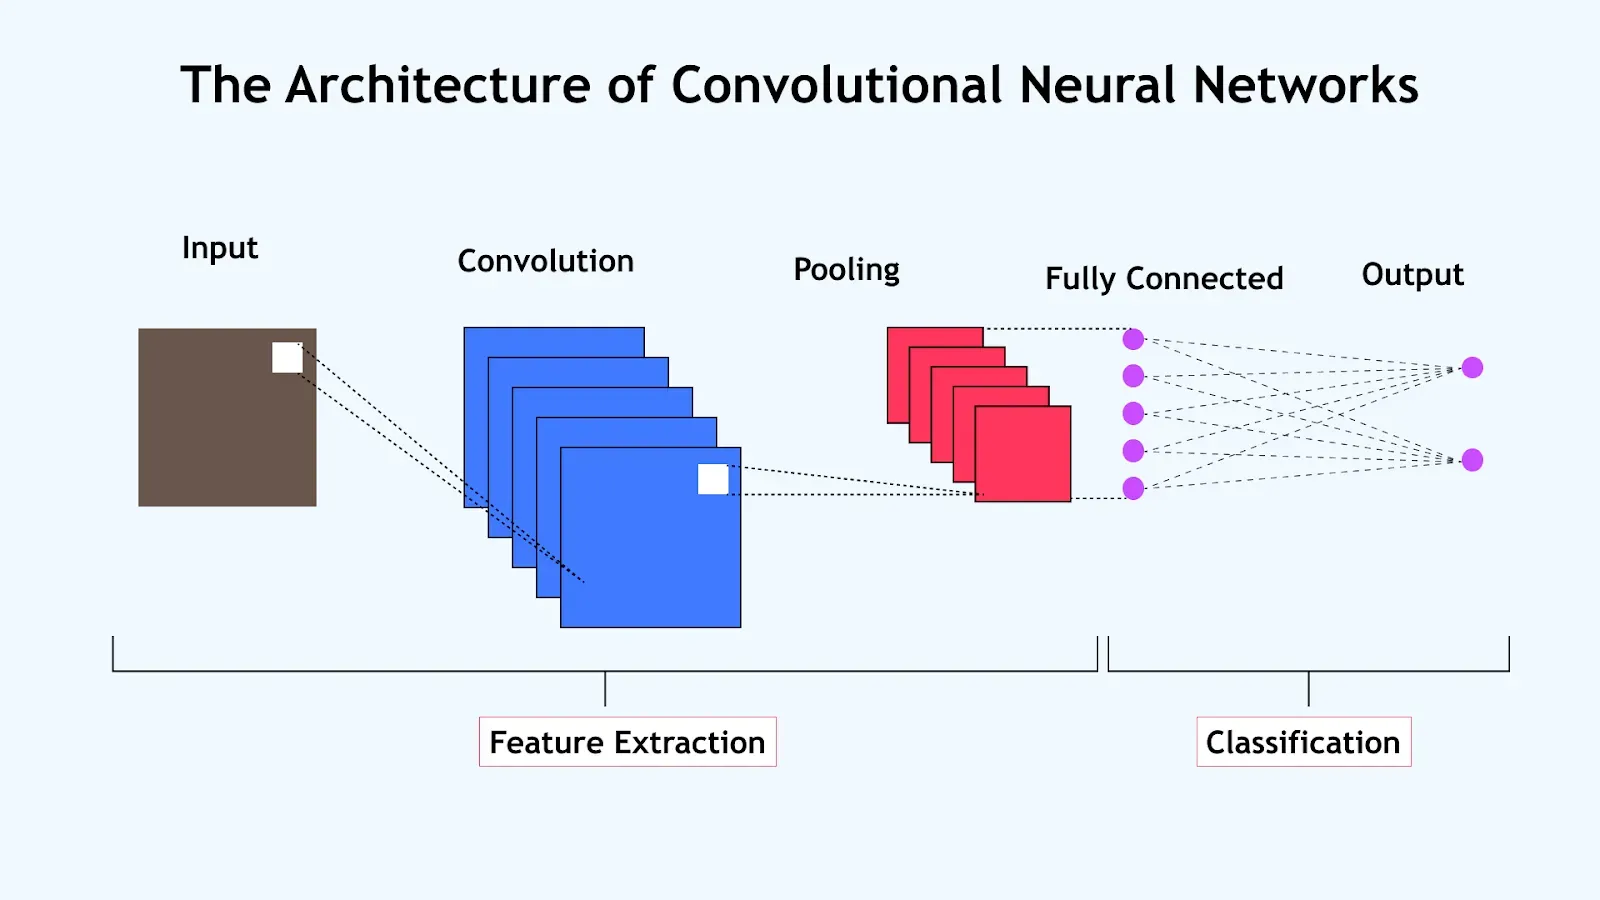
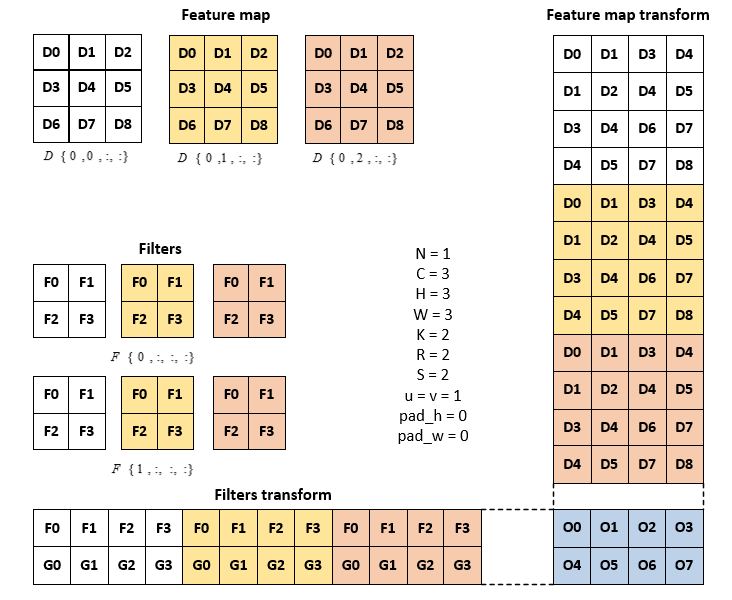 
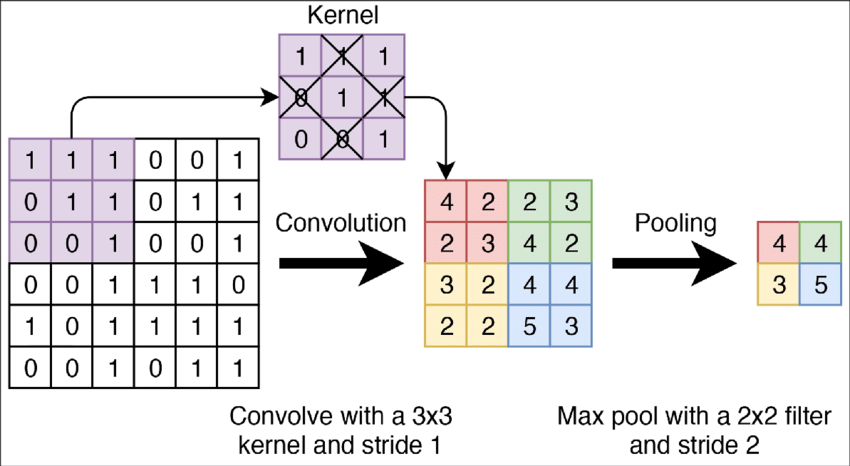
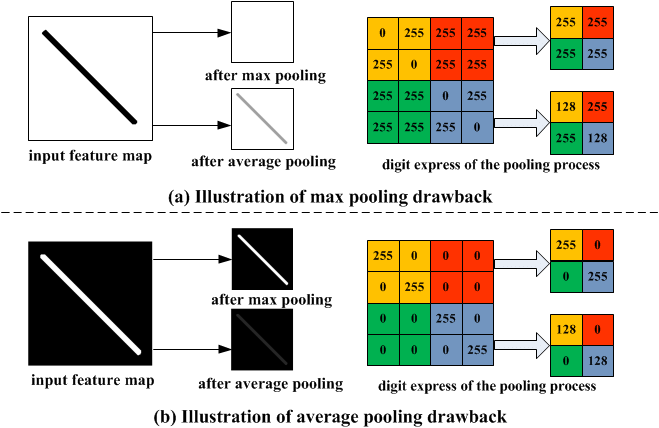

In [6]:
class CNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv = nn.Conv2d(1, 16, kernel_size=3)
        self.pool = nn.MaxPool2d(2)
        self.fc = nn.Linear(16*13*13, 10)

    def forward(self, x):
        x = self.pool(torch.relu(self.conv(x)))
        x = x.view(x.size(0), -1)
        return self.fc(x)


## 12. LSTM Example
LSTM is improved RNN.
It remembers long-term information better.

Used for:

Chatbots

Language models

Stock prediction

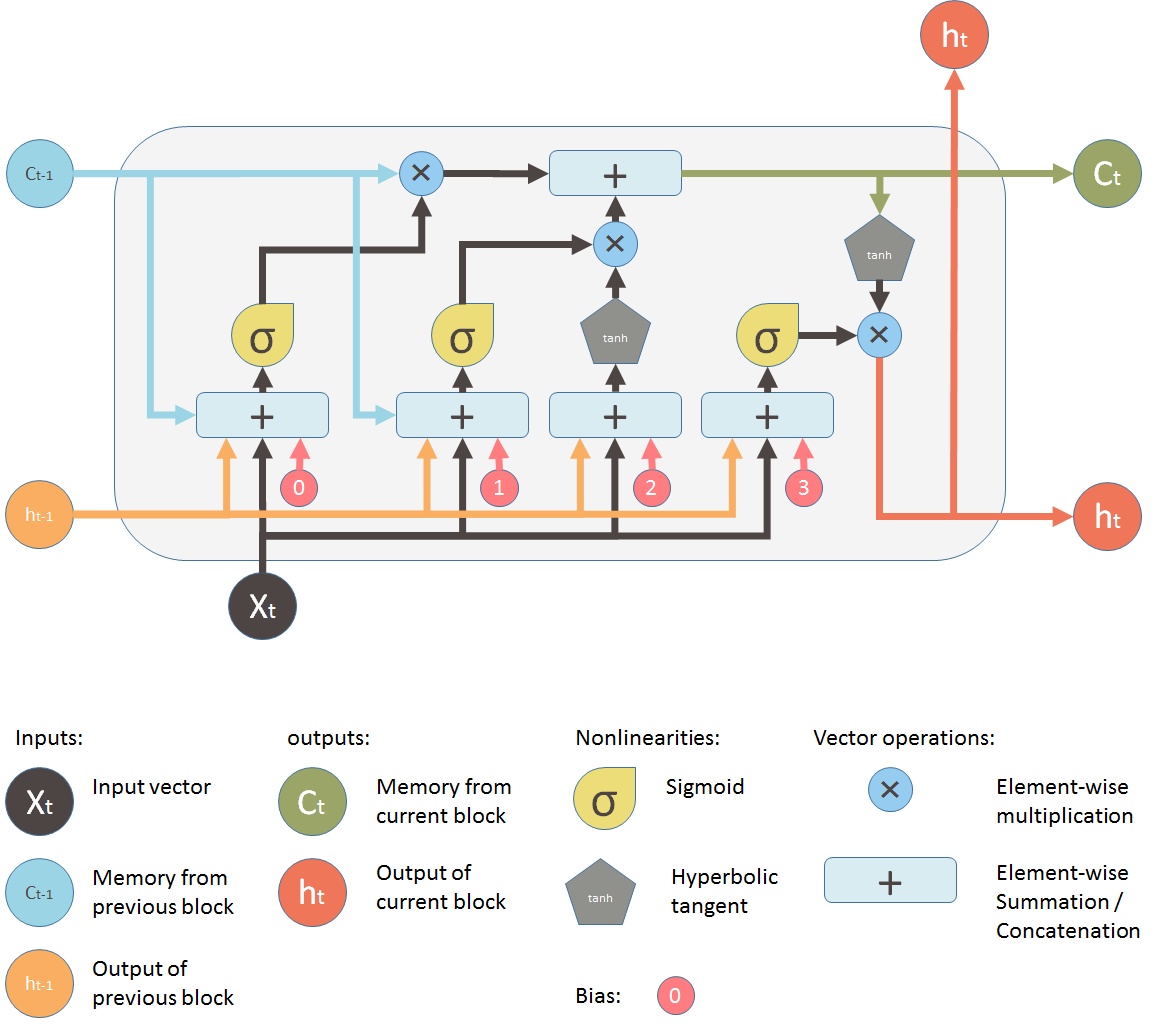
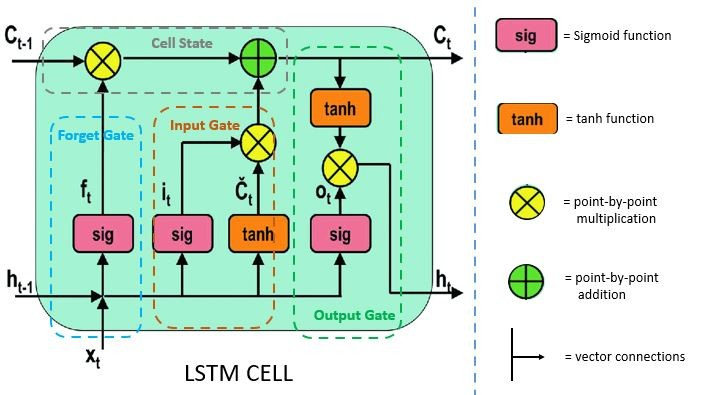
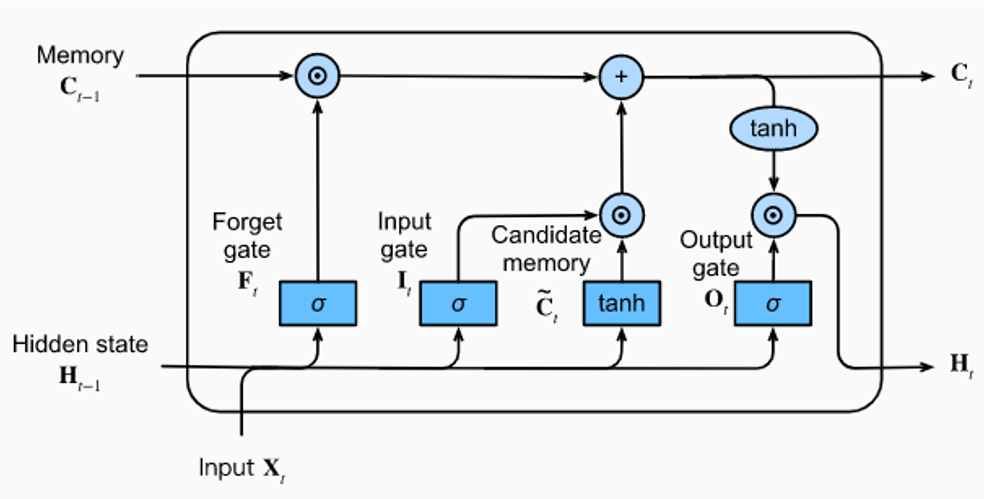
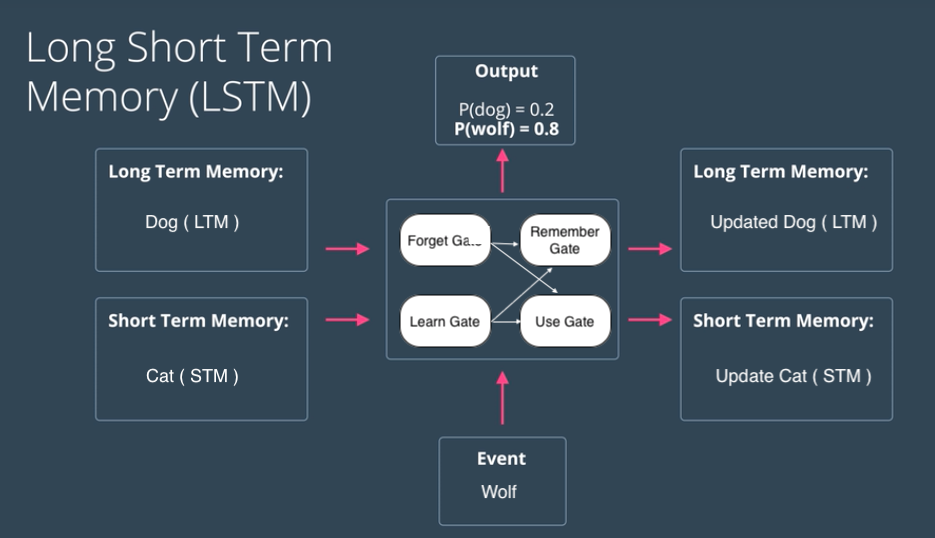

In [7]:
lstm = nn.LSTM(input_size=10, hidden_size=20, batch_first=True)

x = torch.randn(5, 3, 10)
output, (h, c) = lstm(x)

## 13. Transformer Example
Transformer is used in:

GPT

BERT

Modern LLMs

It uses:

Self Attention

Multi-head attention

Positional encoding

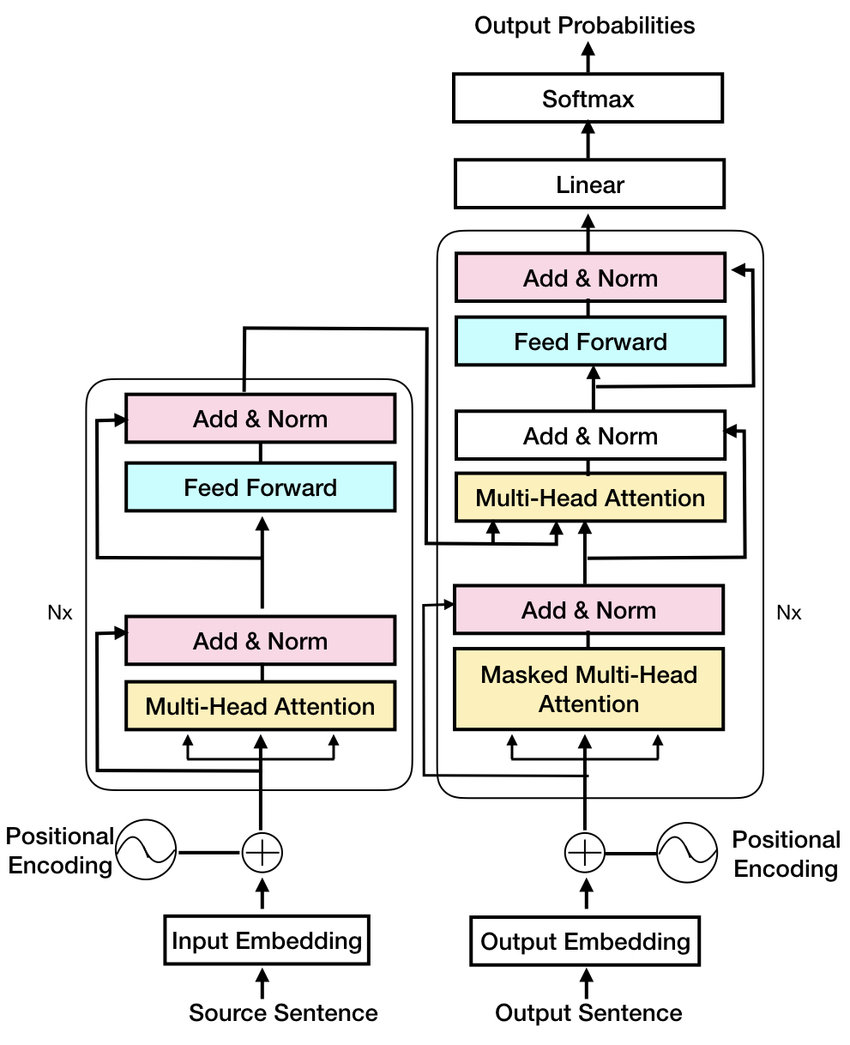
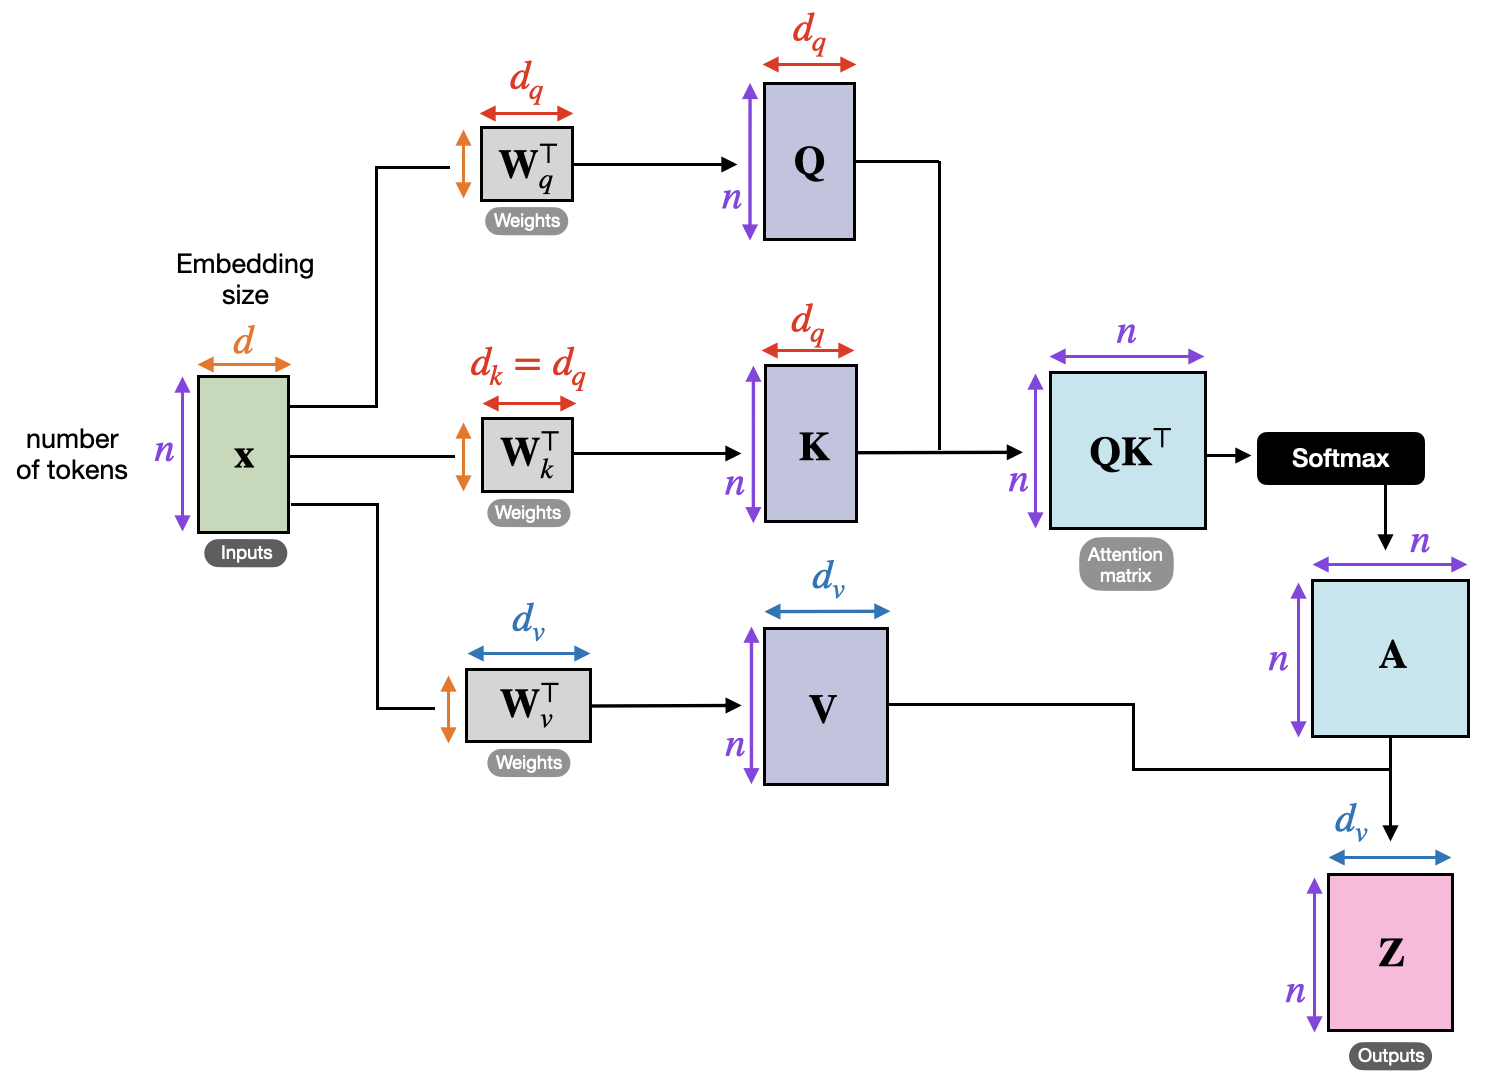
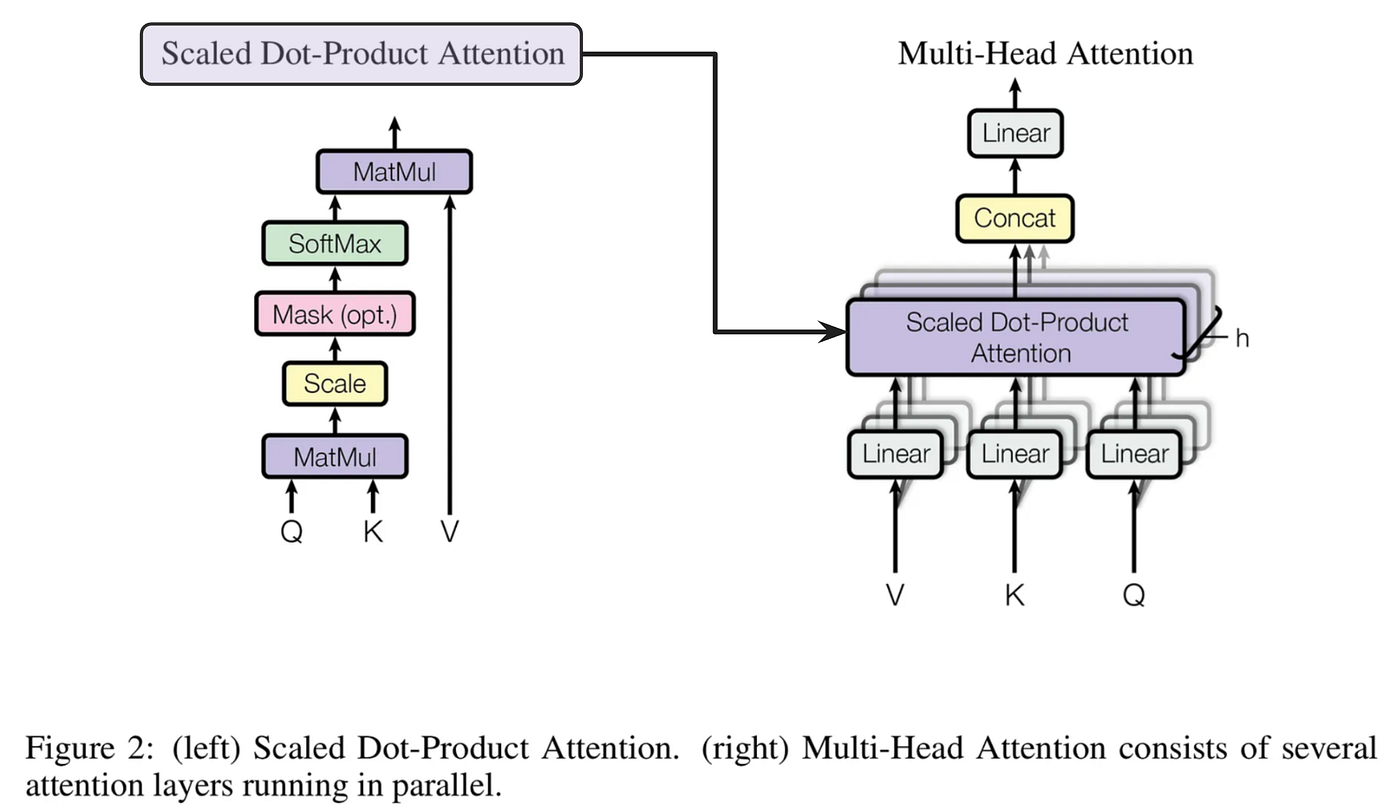
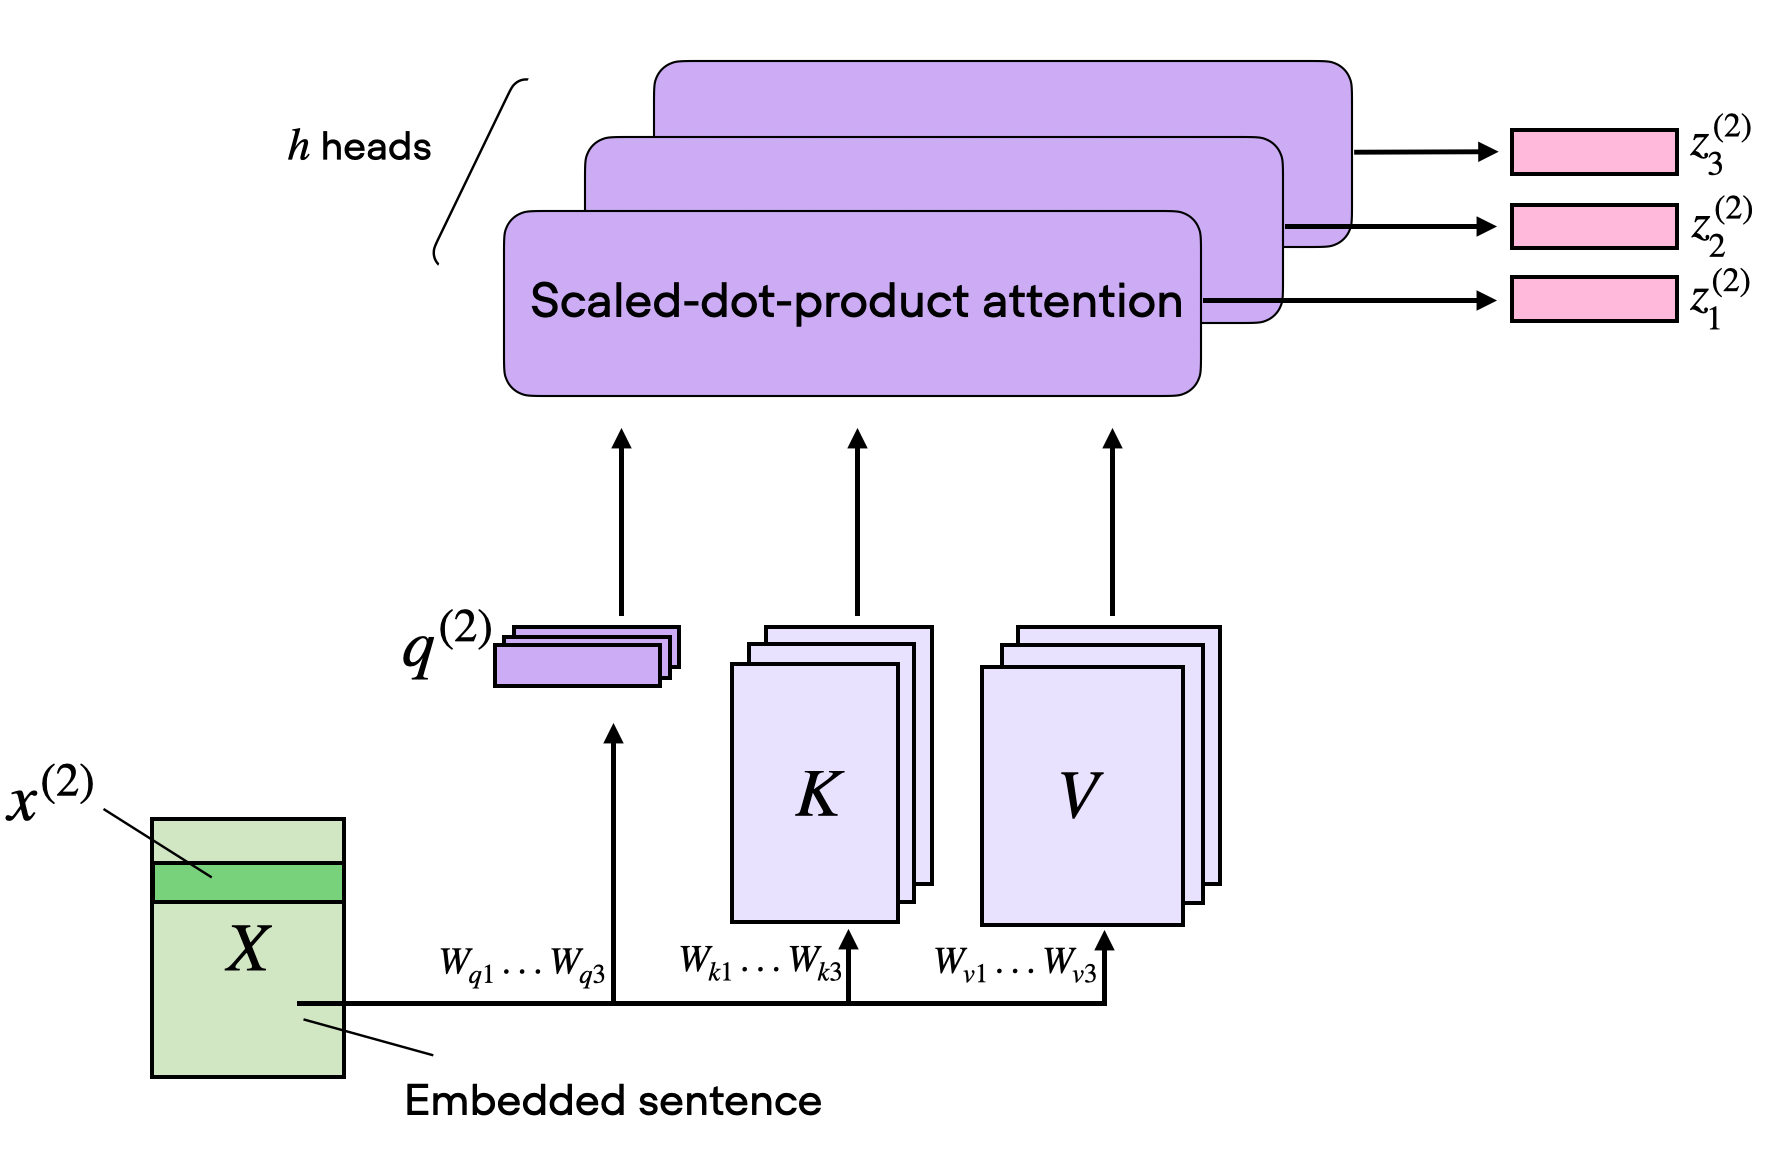

In [17]:
transformer = nn.Transformer(
    d_model=512,
    nhead=8,
    num_encoder_layers=6
)

src = torch.rand((10, 32, 512))  # sequence, batch, features
tgt = torch.rand((20, 32, 512))

out = transformer(src, tgt)


/home/hp/Documents/AIML/AIML_Nov/venv/lib/python3.12/site-packages/torch/nn/modules/transformer.py:144: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  self.encoder = TransformerEncoder(
